In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

# application_train-test-FE

In [6]:
df_ = pd.read_csv("/Users/ibrahimyucel/Downloads/BANKA_PROJE1/home-credit-default-risk/application_train.csv")
app_train = df_.copy()
fd_ = pd.read_csv("/Users/ibrahimyucel/Downloads/BANKA_PROJE1/home-credit-default-risk/application_test.csv")
app_test = fd_.copy()

In [ ]:
app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


📊 AMT_INCOME_TOTAL
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
1%       4.500000e+04
5%       6.750000e+04
50%      1.471500e+05
95%      3.375000e+05
99%      4.725000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


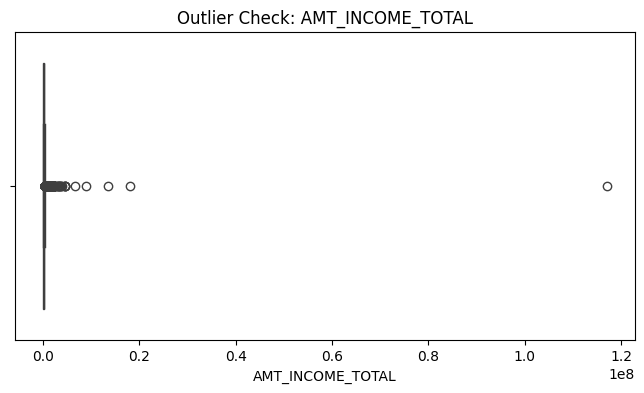

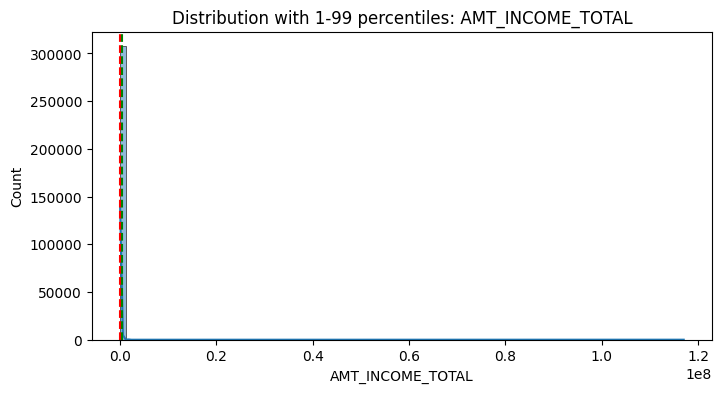


📊 AMT_CREDIT
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
1%       7.641000e+04
5%       1.350000e+05
50%      5.135310e+05
95%      1.350000e+06
99%      1.854000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


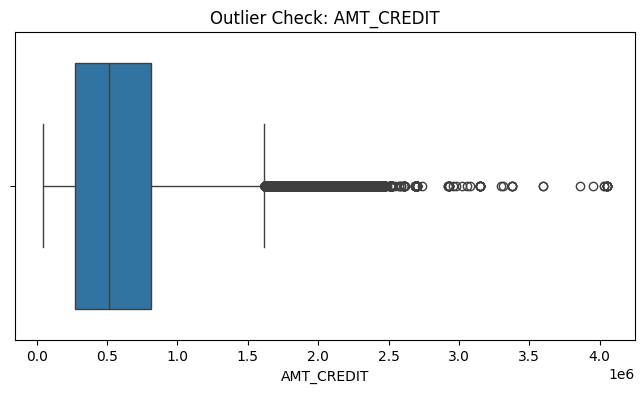

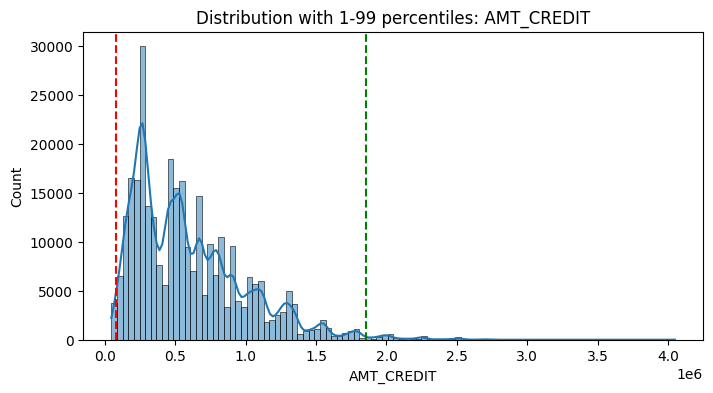


📊 AMT_ANNUITY
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
1%         6183.000000
5%         9000.000000
50%       24903.000000
95%       53325.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


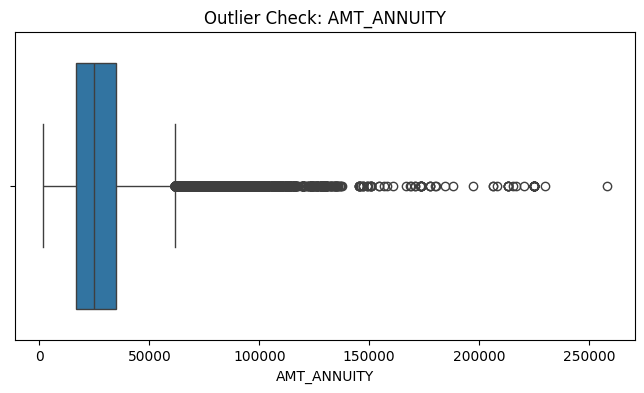

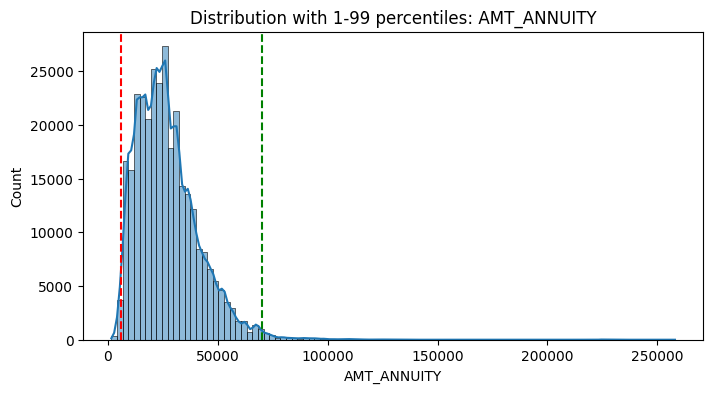


📊 AMT_GOODS_PRICE
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
1%       6.750000e+04
5%       1.350000e+05
50%      4.500000e+05
95%      1.305000e+06
99%      1.800000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


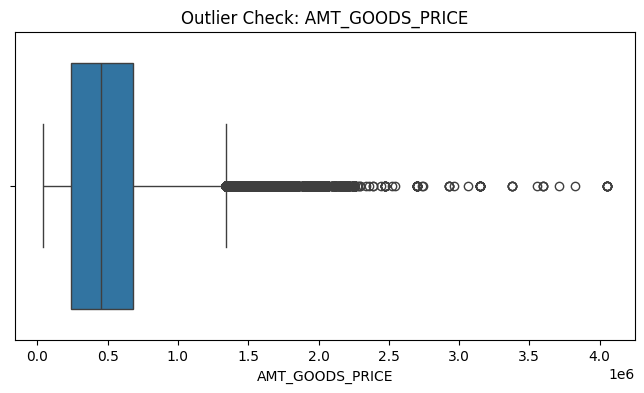

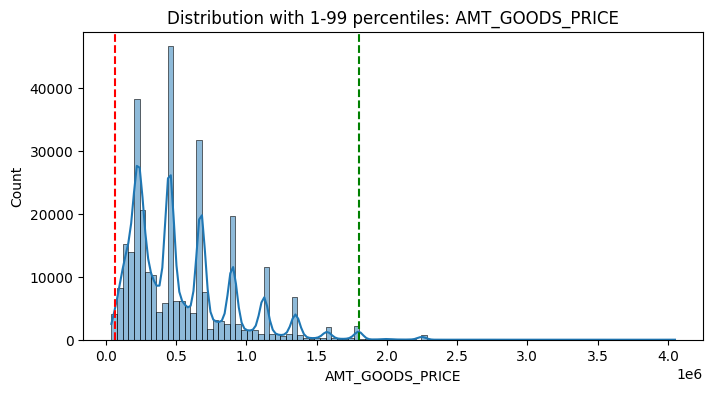


📊 CNT_CHILDREN
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
1%            0.000000
5%            0.000000
50%           0.000000
95%           2.000000
99%           3.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


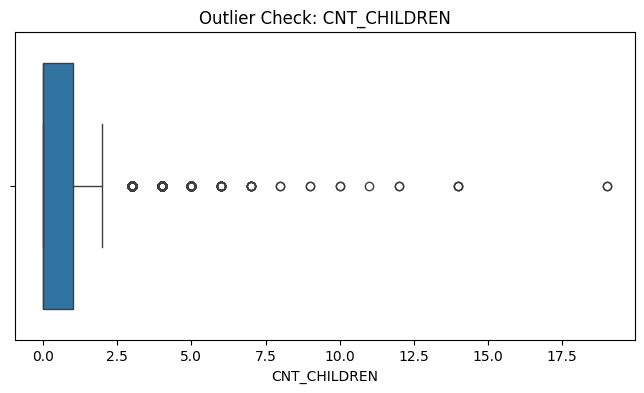

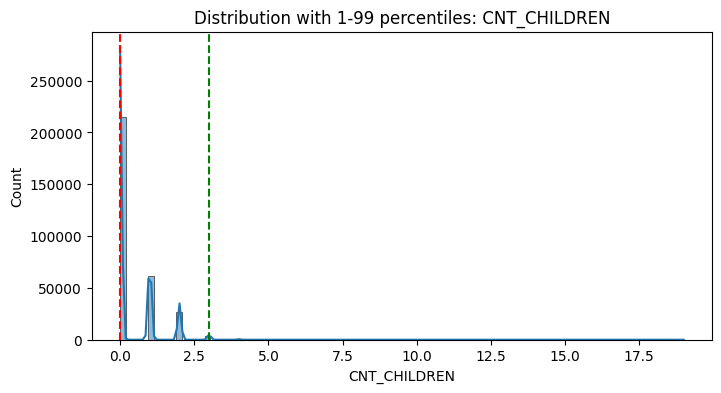


📊 CNT_FAM_MEMBERS
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
1%            1.000000
5%            1.000000
50%           2.000000
95%           4.000000
99%           5.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


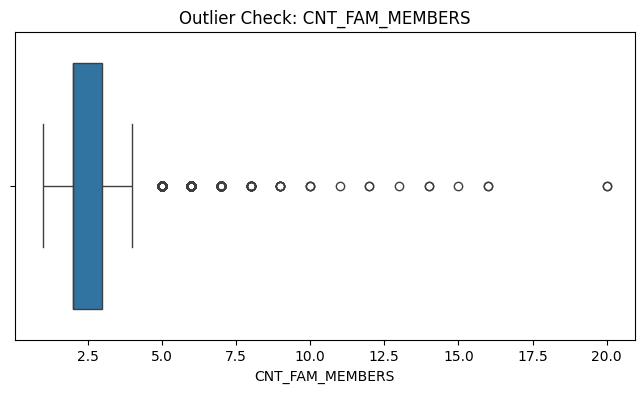

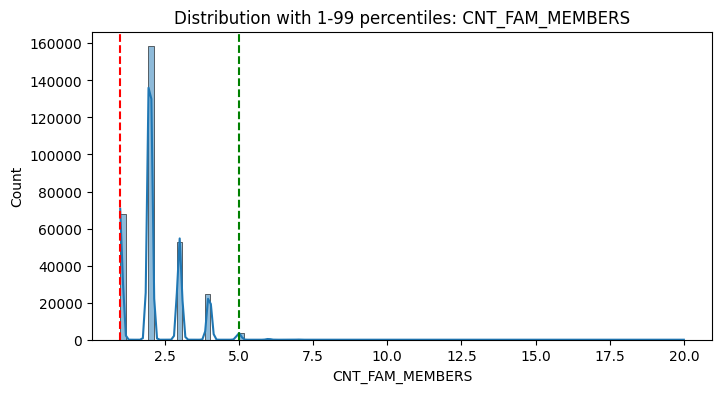


📊 REGION_POPULATION_RELATIVE
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
1%            0.002134
5%            0.004960
50%           0.018850
95%           0.046220
99%           0.072508
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


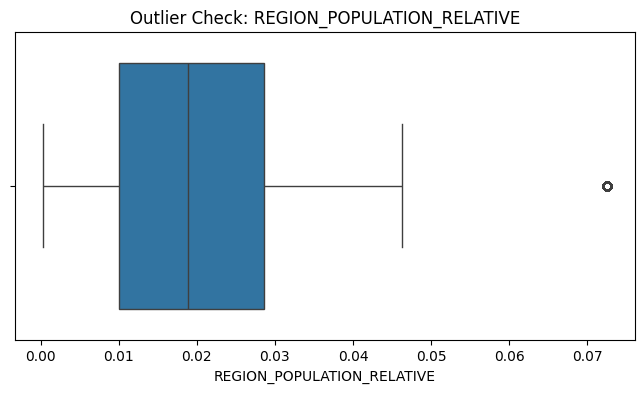

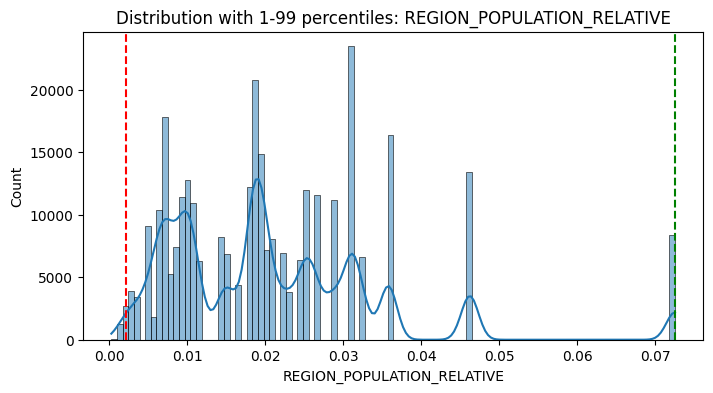

In [32]:
def outlier_analysis(df, cols, q_low=0.01, q_high=0.99):
    for col in cols:
        if col in df.columns:
            print(f"\n📊 {col}")
            print(df[col].describe([0.01, 0.05, 0.95, 0.99]))
            
            # Boxplot
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f"Outlier Check: {col}")
            plt.show()
            
            # Distribution
            plt.figure(figsize=(8, 4))
            sns.histplot(df[col], bins=100, kde=True)
            plt.axvline(df[col].quantile(q_low), color="red", linestyle="--")
            plt.axvline(df[col].quantile(q_high), color="green", linestyle="--")
            plt.title(f"Distribution with {q_low*100:.0f}-{q_high*100:.0f} percentiles: {col}")
            plt.show()

# Example usage
numeric_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", 
                "CNT_CHILDREN", "CNT_FAM_MEMBERS", "REGION_POPULATION_RELATIVE"]

outlier_analysis(app_train, numeric_cols)

In [40]:
datasets = {"train": app_train, "test": app_test}

for name, df in datasets.items():
    print(f"\nProcessing {name.upper()}...")

    # 1) Drop columns with >80% missing
    missing_ratio = df.isnull().mean()
    drop_cols = missing_ratio[missing_ratio > 0.80].index
    df.drop(columns=drop_cols, inplace=True)
    print(f"Dropped {len(drop_cols)} columns with >80% missing.")

    # 2) Medium-level missing (5-80%): add flag + median/0 imputation
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[f"{col}_MISSING_FLAG"] = df[col].isnull().astype(int)

            if df[col].dtype in ["float64", "int64"]:
                # If numeric → fill with median
                df[col].fillna(df[col].median(), inplace=True)
            else:
                # If categorical → fill with 'Unknown'
                df[col].fillna("Unknown", inplace=True)

    # 3) Low missing (<%5): simple imputation (median/Unknown)

    # 4) DAYS_EMPLOYED anomaly (365243 → unemployed code)
    df["DAYS_EMPLOYED_ANOM"] = (df["DAYS_EMPLOYED"] == 365243).astype(int)
    df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)
    df["DAYS_EMPLOYED"].fillna(df["DAYS_EMPLOYED"].median(), inplace=True)

    print(f"Processed {name.upper()} shape: {df.shape}")

# Restore results
app_train, app_test = datasets["train"], datasets["test"]


Processing TRAIN...
Dropped 0 columns with >80% missing.
Processed TRAIN shape: (307511, 190)

Processing TEST...
Dropped 0 columns with >80% missing.
Processed TEST shape: (48744, 186)


/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/3363842636.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)
/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/3363842636.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [41]:
def feature_engineering(df):
    """Feature engineering steps for Home Credit dataset."""

    # ========== AGE ==========
    df["AGE_YEARS"] = (-df["DAYS_BIRTH"]) // 365

    # ========== EMPLOYMENT ==========
    df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)
    df["EMPLOYED_YEARS"] = (-df["DAYS_EMPLOYED"]) // 365
    df["IS_EMPLOYED"] = (~df["DAYS_EMPLOYED"].isna()).astype(int)

    # ========== RATIOS ==========
    df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / (df["AMT_INCOME_TOTAL"] + 1)
    df["ANNUITY_INCOME_RATIO"] = df["AMT_ANNUITY"] / (df["AMT_INCOME_TOTAL"] + 1)
    df["CREDIT_ANNUITY_RATIO"] = df["AMT_CREDIT"] / (df["AMT_ANNUITY"] + 1)
    df["GOODS_CREDIT_RATIO"] = df["AMT_GOODS_PRICE"] / (df["AMT_CREDIT"] + 1)

    # ========== EXT SOURCES (RAW + POLYNOMIAL) ==========
    for col in ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]:
        df[col] = df[col]  # keep raw
    
    df["EXT_S1_S2"] = df["EXT_SOURCE_1"] * df["EXT_SOURCE_2"]
    df["EXT_S1_S3"] = df["EXT_SOURCE_1"] * df["EXT_SOURCE_3"]
    df["EXT_S2_S3"] = df["EXT_SOURCE_2"] * df["EXT_SOURCE_3"]

    df["EXT_S1_S2_S3"] = df["EXT_SOURCE_1"] * df["EXT_SOURCE_2"] * df["EXT_SOURCE_3"]

    df["EXT_S1_SQ"] = df["EXT_SOURCE_1"] ** 2
    df["EXT_S2_SQ"] = df["EXT_SOURCE_2"] ** 2
    df["EXT_S3_SQ"] = df["EXT_SOURCE_3"] ** 2

    # ========== FAMILY / CHILD ==========
    df["CHILD_RATIO"] = df["CNT_CHILDREN"] / (df["CNT_FAM_MEMBERS"] + 1)

    # ========== REGION ==========
    df["REGION_POP_REL"] = df["REGION_POPULATION_RELATIVE"]
    df["REGION_RATING"] = df["REGION_RATING_CLIENT"]

    return df

# Apply for both train and test
app_train_fe = feature_engineering(app_train.copy())
app_test_fe = feature_engineering(app_test.copy())

/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/3353602252.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)
/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/3353602252.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [42]:
def handle_outliers(df):
    """
    Handle outliers in application data (train or test).
    Combines Kaggle-winning strategies + our analysis.
    """

    # ---- 1) DAYS_EMPLOYED anomaly ----
    df["IS_EMPLOYED_ANOM"] = (df["DAYS_EMPLOYED"] == 365243).astype(int)
    df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].replace(365243, np.nan)

    # ---- 2) CNT_CHILDREN ----
    df["CNT_CHILDREN"] = df["CNT_CHILDREN"].clip(upper=10)

    # ---- 3) OWN_CAR_AGE ----
    if "OWN_CAR_AGE" in df.columns:
        df["OWN_CAR_AGE"] = df["OWN_CAR_AGE"].clip(upper=50)

    # ---- 4) AMT_INCOME_TOTAL ----
    df["AMT_INCOME_TOTAL"] = df["AMT_INCOME_TOTAL"].clip(upper=1_000_000)

    # ---- 5) Main financial columns ----
    cols_to_cap = ["AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]
    for col in cols_to_cap:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = df[col].clip(lower, upper)

    # ---- 6) REGION_POPULATION_RELATIVE ----
    if "REGION_POPULATION_RELATIVE" in df.columns:
        df["REGION_POPULATION_RELATIVE"] = df["REGION_POPULATION_RELATIVE"].clip(upper=0.05)

    # ---- 7) Log transform for skewed financial features ----
    cols_to_log = ["AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "AMT_INCOME_TOTAL"]
    for col in cols_to_log:
        df[col + "_LOG"] = np.log1p(df[col])

    return df

app_train_fe = handle_outliers(app_train_fe)
app_test_fe = handle_outliers(app_test_fe)

# BUREAU FE

In [10]:
bureau_ = pd.read_csv("/Users/ibrahimyucel/Downloads/BANKA_PROJE1/home-credit-default-risk/bureau.csv")
bureau = bureau_.copy()

In [11]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [12]:
# 1. Numerical columns: median impute + missing flag
num_cols = ["AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM", "AMT_ANNUITY"]

for col in num_cols:
    bureau[f"{col}_MISSING"] = bureau[col].isna().astype(int)
    bureau[col] = bureau[col].fillna(bureau[col].median())

# 2. Date columns: keep NaN, just add missing flag
date_cols = ["DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT"]

for col in date_cols:
    bureau[f"{col}_MISSING"] = bureau[col].isna().astype(int)

# 3. High missing ratio columns → drop
high_missing_cols = ["AMT_CREDIT_MAX_OVERDUE"]  # ~65% missing
bureau = bureau.drop(columns=high_missing_cols)

print("✅ Bureau missing values handled")

✅ Bureau missing values handled


In [13]:
bureau.isnull().sum()

SK_ID_CURR                           0
SK_ID_BUREAU                         0
CREDIT_ACTIVE                        0
CREDIT_CURRENCY                      0
DAYS_CREDIT                          0
CREDIT_DAY_OVERDUE                   0
DAYS_CREDIT_ENDDATE             105553
DAYS_ENDDATE_FACT               633653
CNT_CREDIT_PROLONG                   0
AMT_CREDIT_SUM                       0
AMT_CREDIT_SUM_DEBT                  0
AMT_CREDIT_SUM_LIMIT                 0
AMT_CREDIT_SUM_OVERDUE               0
CREDIT_TYPE                          0
DAYS_CREDIT_UPDATE                   0
AMT_ANNUITY                          0
AMT_CREDIT_SUM_DEBT_MISSING          0
AMT_CREDIT_SUM_LIMIT_MISSING         0
AMT_CREDIT_SUM_MISSING               0
AMT_ANNUITY_MISSING                  0
DAYS_CREDIT_ENDDATE_MISSING          0
DAYS_ENDDATE_FACT_MISSING            0
dtype: int64

In [33]:
def outlier_analysis(df, cols):
    results = {}
    for col in cols:
        desc = df[col].describe(percentiles=[0.01,0.05,0.95,0.99]).to_dict()
        results[col] = {
            "min": desc["min"],
            "1%": desc["1%"],
            "5%": desc["5%"],
            "95%": desc["95%"],
            "99%": desc["99%"],
            "max": desc["max"],
            "std": desc["std"],
            "mean": desc["mean"]
        }
    return pd.DataFrame(results).T


num_cols = [
    "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT",
    "AMT_CREDIT_SUM_OVERDUE", "AMT_ANNUITY",
    "DAYS_CREDIT", "DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT",
    "CREDIT_DAY_OVERDUE"
]

outlier_summary = outlier_analysis(bureau, num_cols)

print(outlier_summary)

                                min      1%       5%        95%          99%  \
AMT_CREDIT_SUM                0.000     0.0  11250.0  1350000.0  3700898.550   
AMT_CREDIT_SUM_DEBT    -4705600.320     0.0      0.0   537397.2  2028225.780   
AMT_CREDIT_SUM_LIMIT    -586406.115     0.0      0.0        0.0   135000.000   
AMT_CREDIT_SUM_OVERDUE        0.000     0.0      0.0        0.0        0.000   
AMT_ANNUITY                   0.000     0.0      0.0    20209.5    57562.785   
DAYS_CREDIT               -2922.000 -2867.0  -2665.0     -125.0      -38.000   
DAYS_CREDIT_ENDDATE      -42060.000 -2571.0  -2262.0     2623.0    31029.000   
DAYS_ENDDATE_FACT        -42023.000 -2639.0  -2393.0      -94.0      -24.000   
CREDIT_DAY_OVERDUE            0.000     0.0      0.0        0.0        0.000   

                                 max           std           mean  
AMT_CREDIT_SUM          5.850000e+08  1.149807e+06  354992.853896  
AMT_CREDIT_SUM_DEBT     1.701000e+08  6.264058e+05  116505.9952

In [43]:
def handle_outliers_bureau(df):
    # Negative values → set to 0
    for col in ["AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT"]:
        df[col] = df[col].clip(lower=0)

    # Winsorize extreme values (99.5 percentile)
    num_cols = [
        "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT",
        "AMT_CREDIT_SUM_OVERDUE", "AMT_ANNUITY"
    ]
    for col in num_cols:
        upper = df[col].quantile(0.995)
        df[col] = df[col].clip(upper=upper)

    # DAYS columns → clean unrealistic values (>|30000|)
    day_cols = ["DAYS_CREDIT", "DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT"]
    for col in day_cols:
        df[col] = df[col].mask(df[col].abs() > 30000, np.nan)

    # Overdue columns → flag + keep
    df["HAS_OVERDUE"] = (df["AMT_CREDIT_SUM_OVERDUE"] > 0).astype(int)

    return df

bureau = handle_outliers_bureau(bureau)

In [44]:
# Risky credit flags
bureau["IS_BADDEBT"] = (bureau["CREDIT_ACTIVE"] == "Bad debt").astype(int)
bureau["IS_SOLD"] = (bureau["CREDIT_ACTIVE"] == "Sold").astype(int)
bureau["IS_OVERDUE"] = (bureau["AMT_CREDIT_SUM_OVERDUE"] > 0).astype(int)

# Secured loan flag
bureau["IS_SECURED"] = bureau["CREDIT_TYPE"].isin(["Mortgage", "Car loan"]).astype(int)

# Recent & old credit flags
bureau["RECENT_CREDIT"] = (bureau["DAYS_CREDIT"] > -365).astype(int)   # last 1 year
bureau["OLD_CREDIT"] = (bureau["DAYS_CREDIT"] < -1825).astype(int)    # older than 5 years
bureau["LONG_OVERDUE"] = (bureau["CREDIT_DAY_OVERDUE"] > 90).astype(int)

# Aggregations
bureau_agg = bureau.groupby("SK_ID_CURR").agg(
    NUM_CREDITS=("SK_ID_BUREAU", "count"),
    NUM_ACTIVE=("CREDIT_ACTIVE", lambda x: (x == "Active").sum()),
    NUM_CLOSED=("CREDIT_ACTIVE", lambda x: (x == "Closed").sum()),
    NUM_BADDEBT=("IS_BADDEBT", "sum"),
    NUM_SOLD=("IS_SOLD", "sum"),
    TOTAL_DEBT=("AMT_CREDIT_SUM_DEBT", "sum"),
    TOTAL_CREDIT=("AMT_CREDIT_SUM", "sum"),
    TOTAL_OVERDUE=("AMT_CREDIT_SUM_OVERDUE", "sum"),
    AVG_DAYS_CREDIT=("DAYS_CREDIT", "mean"),
    MAX_OVERDUE=("CREDIT_DAY_OVERDUE", "max"),
    NUM_OVERDUE=("IS_OVERDUE", "sum"),
    LONG_OVERDUE_COUNT=("LONG_OVERDUE", "sum"),
    RECENT_CREDIT_COUNT=("RECENT_CREDIT", "sum"),
    OLD_CREDIT_COUNT=("OLD_CREDIT", "sum"),
    NUM_SECURED_CREDITS=("IS_SECURED", "sum"),
).reset_index()

# Ratios
bureau_agg["DEBT_RATIO"] = bureau_agg["TOTAL_DEBT"] / (bureau_agg["TOTAL_CREDIT"] + 1e-5)
bureau_agg["RISKY_CREDIT_RATIO"] = (bureau_agg["NUM_BADDEBT"] + bureau_agg["NUM_SOLD"]) / (bureau_agg["NUM_CREDITS"] + 1e-5)

# Merge with train/test
app_train_fe = app_train_fe.merge(bureau_agg, on="SK_ID_CURR", how="left")
app_test_fe = app_test_fe.merge(bureau_agg, on="SK_ID_CURR", how="left")

# BUREAU BALANCE

In [14]:
bureau_balance_ = pd.read_csv("/Users/ibrahimyucel/Downloads/BANKA_PROJE1/home-credit-default-risk/bureau_balance.csv")
bureau_balance = bureau_balance_.copy()

In [15]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [45]:
# Map STATUS to numeric severity
status_map = {
    'C': 0,  # Closed
    '0': 0,  # No overdue
    '1': 1,  # 1-30 days overdue
    '2': 2,  # 31-60 days overdue
    '3': 3,  # 61-90 days overdue
    '4': 4,  # 91-120 days overdue
    '5': 5   # 120+ days overdue
}
bureau_balance["STATUS_NUM"] = bureau_balance["STATUS"].map(status_map)

# Basic flags
bureau_balance["HAS_OVERDUE"] = (bureau_balance["STATUS_NUM"] > 0).astype(int)
bureau_balance["IS_CLOSED"] = (bureau_balance["STATUS"] == "C").astype(int)
bureau_balance["IS_ON_TIME"] = (bureau_balance["STATUS"] == "0").astype(int)
bureau_balance["IS_LONG_OVERDUE"] = (bureau_balance["STATUS_NUM"] >= 3).astype(int)  # 90+ days overdue

# Aggregate per SK_ID_BUREAU (loan level)
bb_agg = bureau_balance.groupby("SK_ID_BUREAU").agg(
    MAX_STATUS=("STATUS_NUM", "max"),
    AVG_STATUS=("STATUS_NUM", "mean"),
    OVERDUE_COUNT=("HAS_OVERDUE", "sum"),
    ON_TIME_COUNT=("IS_ON_TIME", "sum"),
    CLOSED_COUNT=("IS_CLOSED", "sum"),
    LONG_OVERDUE_COUNT=("IS_LONG_OVERDUE", "sum"),
    TOTAL_MONTHS=("STATUS_NUM", "count"),
    LAST_OVERDUE_MONTH=("MONTHS_BALANCE", lambda x: x[bureau_balance.loc[x.index, "HAS_OVERDUE"] == 1].max()
                        if (bureau_balance.loc[x.index, "HAS_OVERDUE"] == 1).any() else -99)
).reset_index()

# Ratios
bb_agg["OVERDUE_RATIO"] = bb_agg["OVERDUE_COUNT"] / (bb_agg["TOTAL_MONTHS"] + 1e-5)

# Merge back to bureau (loan level)
bureau = bureau.merge(bb_agg, on="SK_ID_BUREAU", how="left")

# Aggregate to customer level (SK_ID_CURR)
bureau_balance_agg = bureau.groupby("SK_ID_CURR").agg(
    MAX_OVERDUE_STATUS=("MAX_STATUS", "max"),
    AVG_OVERDUE_STATUS=("AVG_STATUS", "mean"),
    TOTAL_OVERDUE_COUNT=("OVERDUE_COUNT", "sum"),
    TOTAL_ON_TIME_COUNT=("ON_TIME_COUNT", "sum"),
    TOTAL_CLOSED_COUNT=("CLOSED_COUNT", "sum"),
    TOTAL_LONG_OVERDUE=("LONG_OVERDUE_COUNT", "sum"),
    AVG_OVERDUE_RATIO=("OVERDUE_RATIO", "mean"),
    HAS_ANY_OVERDUE=("OVERDUE_COUNT", lambda x: (x > 0).any().astype(int)),
    LAST_OVERDUE_MONTH=("LAST_OVERDUE_MONTH", "max")
).reset_index()

# Merge into app_train_fe and app_test_fe
app_train_fe = app_train_fe.merge(bureau_balance_agg, on="SK_ID_CURR", how="left")
app_test_fe  = app_test_fe.merge(bureau_balance_agg, on="SK_ID_CURR", how="left")

# Previous Application

In [18]:
prv_app_ = pd.read_csv("/Users/ibrahimyucel/Downloads/BANKA_PROJE1/home-credit-default-risk/previous_application.csv")
previous_application = prv_app_.copy()

In [19]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [46]:
def clean_previous_app(prev):
    prev = prev.copy()
    
    # 1. AMT_CREDIT - only 1 missing -> drop
    prev = prev[~prev["AMT_CREDIT"].isna()]

    # 2. High-null rate: Interest rates -> binary flags, drop original
    prev["HAS_PRIMARY_INTEREST"] = (~prev["RATE_INTEREST_PRIMARY"].isna()).astype(int)
    prev["HAS_PRIVILEGED_INTEREST"] = (~prev["RATE_INTEREST_PRIVILEGED"].isna()).astype(int)
    prev.drop(["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"], axis=1, inplace=True)

    # 3. AMT_DOWN_PAYMENT (50% null) -> flag + fill with 0
    prev["HAS_DOWN_PAYMENT"] = (~prev["AMT_DOWN_PAYMENT"].isna()).astype(int)
    prev["AMT_DOWN_PAYMENT"].fillna(0, inplace=True)

    # 4. NAME_TYPE_SUITE (47% null) -> flag + "Alone"
    prev["WITH_COMPANION"] = (~prev["NAME_TYPE_SUITE"].isna()).astype(int)
    prev["NAME_TYPE_SUITE"].fillna("Alone", inplace=True)

    # 5. AMT_ANNUITY (21% null) -> flag + median impute
    prev["HAS_ANNUITY"] = (~prev["AMT_ANNUITY"].isna()).astype(int)
    prev["AMT_ANNUITY"].fillna(prev["AMT_ANNUITY"].median(), inplace=True)

    # 6. CNT_PAYMENT (21% null) -> flag + median impute
    prev["HAS_CNT_PAYMENT"] = (~prev["CNT_PAYMENT"].isna()).astype(int)
    prev["CNT_PAYMENT"].fillna(prev["CNT_PAYMENT"].median(), inplace=True)

    # 7. AMT_GOODS_PRICE (22% null) -> flag + median impute
    prev["HAS_GOODS_PRICE"] = (~prev["AMT_GOODS_PRICE"].isna()).astype(int)
    prev["AMT_GOODS_PRICE"].fillna(prev["AMT_GOODS_PRICE"].median(), inplace=True)

    # 8. PRODUCT_COMBINATION (0.02% null) -> fill with "Unknown"
    prev["PRODUCT_COMBINATION"].fillna("Unknown", inplace=True)

    # 9. DAYS_* columns with 365243 -> set to NaN + flag
    days_cols = [
        "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION",
        "DAYS_LAST_DUE", "DAYS_TERMINATION"
    ]
    for col in days_cols:
        prev[col].replace(365243, np.nan, inplace=True)
        prev[f"{col}_MISSING"] = prev[col].isna().astype(int)

    # 10. NFLAG_INSURED_ON_APPROVAL (39% null) -> flag + fill with 0
    prev["HAS_INSURANCE"] = (~prev["NFLAG_INSURED_ON_APPROVAL"].isna()).astype(int)
    prev["NFLAG_INSURED_ON_APPROVAL"].fillna(0, inplace=True)

    return prev

# Apply to train & test
previous_application = clean_previous_app(previous_application)

/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/3157488117.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prev["AMT_DOWN_PAYMENT"].fillna(0, inplace=True)
/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/3157488117.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [34]:
def outlier_analysis_prev_app(df):
    results = {}
    num_cols = [
        "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", 
        "AMT_DOWN_PAYMENT", "AMT_GOODS_PRICE",
        "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED",
        "CNT_PAYMENT", "DAYS_DECISION", "DAYS_FIRST_DRAWING",
        "DAYS_FIRST_DUE", "DAYS_LAST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_TERMINATION"
    ]

    for col in num_cols:
        desc = df[col].describe(percentiles=[0.01, 0.05, 0.95, 0.99]).to_dict()
        results[col] = {
            "min": desc["min"],
            "1%": desc.get("1%", None),
            "5%": desc.get("5%", None),
            "95%": desc.get("95%", None),
            "99%": desc.get("99%", None),
            "max": desc["max"],
            "std": desc["std"],
            "mean": desc["mean"]
        }

    return pd.DataFrame(results).T

outlier_summary_prev = outlier_analysis_prev_app(previous_application)
outlier_summary_prev

,min,1%,5%,95%,99%,max,std,mean
AMT_ANNUITY,0.000000,2137.175100,2726.595000,45336.780000,6.968579e+04,418058.145,14782.137335,15955.120659
AMT_APPLICATION,0.000000,0.000000,0.000000,787500.000000,1.350000e+06,6905160.000,292779.762386,175233.860360
AMT_CREDIT,0.000000,0.000000,0.000000,886500.000000,1.515378e+06,6905160.000,318574.616547,196114.021218
AMT_DOWN_PAYMENT,-0.900000,0.000000,0.000000,26184.082500,6.593089e+04,3060045.000,20921.495410,6697.402139
AMT_GOODS_PRICE,0.000000,15300.000000,22882.500000,900000.000000,1.395000e+06,6905160.000,315396.557937,227847.279283
RATE_DOWN_PAYMENT,-0.000015,0.000000,0.000000,0.294126,5.210847e-01,1.000,0.107823,0.079637
RATE_INTEREST_PRIMARY,0.034781,0.059135,0.142440,0.196914,6.961776e-01,1.000,0.087671,0.188357
RATE_INTEREST_PRIVILEGED,0.373150,0.424419,0.637949,0.867336,8.673362e-01,1.000,0.100879,0.773503
CNT_PAYMENT,0.000000,0.000000,0.000000,48.000000,6.000000e+01,84.000,14.567288,16.054082
DAYS_DECISION,-2922.000000,-2835.000000,-2559.000000,-85.000000,-1.400000e+01,-1.000,779.099667,-880.679668


In [49]:
print(previous_application.columns.tolist())

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'HAS_PRIMARY_INTEREST', 'HAS_PRIVILEGED_INTEREST', 'HAS_DOWN_PAYMENT', 'WITH_COMPANION', 'HAS_ANNUITY', 'HAS_CNT_PAYMENT', 'HAS_GOODS_PRICE', 'DAYS_FIRST_DRAWING_MISSING', 'DAYS_FIRST_DUE_MISSING', 'DAYS_LAST_DUE_1ST_VERSION_MISSING', 'DAYS_LAST_DUE_MISSING', 'DA

In [50]:
def clean_prev_app(prev):
    # Fix placeholder values (365243 → NaN)
    days_cols = [
        "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE",
        "DAYS_LAST_DUE", "DAYS_LAST_DUE_1ST_VERSION",
        "DAYS_TERMINATION"
    ]
    for col in days_cols:
        prev[col] = prev[col].replace(365243, np.nan)
        prev[col + "_MISSING"] = prev[col].isna().astype(int)  # flag
    
    # Fix negative values in RATE columns (sadece RATE_DOWN_PAYMENT kaldı)
    if "RATE_DOWN_PAYMENT" in prev.columns:
        prev["RATE_DOWN_PAYMENT"] = prev["RATE_DOWN_PAYMENT"].clip(lower=0)
    
    # Winsorize AMT_* variables (cap at 99.5%)
    amt_cols = ["AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY",
                "AMT_GOODS_PRICE", "AMT_DOWN_PAYMENT"]
    for col in amt_cols:
        if col in prev.columns:
            upper = prev[col].quantile(0.995)
            prev[col] = np.where(prev[col] > upper, upper, prev[col])
    
    # Log transform AMT_* variables (to reduce skewness)
    for col in amt_cols:
        if col in prev.columns:
            prev[col + "_LOG"] = np.log1p(prev[col])
    
    # CNT_PAYMENT binning
    if "CNT_PAYMENT" in prev.columns:
        prev["CNT_PAYMENT_BIN"] = pd.cut(
            prev["CNT_PAYMENT"],
            bins=[-1, 12, 36, 100],  # short, mid, long
            labels=["short_term", "mid_term", "long_term"]
        )
    
    return prev

previous_application = clean_prev_app(previous_application)

In [52]:
def fe_previous_application(prev):
    prev = prev.copy()

    # ---- 1. Numeric Ratios & Transformations ----
    prev["CREDIT_APPLICATION_RATIO"] = prev["AMT_CREDIT"] / (prev["AMT_APPLICATION"] + 1e-5)
    prev["CREDIT_APPLICATION_RATIO"] = prev["CREDIT_APPLICATION_RATIO"].clip(0, 5)  # Winsorize >5
    
    prev["ANNUITY_CREDIT_RATIO"] = prev["AMT_ANNUITY"] / (prev["AMT_CREDIT"] + 1e-5)
    prev["CREDIT_TERM"] = prev["AMT_CREDIT"] / (prev["AMT_ANNUITY"] + 1e-5)

    # Log transforms
    for col in ["AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]:
        prev[f"LOG_{col}"] = np.log1p(prev[col].clip(lower=0))

    # Winsorize numeric amounts (99.5 percentile)
    for col in ["AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]:
        upper = prev[col].quantile(0.995)
        prev[col] = prev[col].clip(upper=upper)

    # ---- 2. Flags for Missing Values ----
    prev["HAS_PRIMARY_INTEREST_INFO"] = prev["RATE_INTEREST_PRIMARY"].notna().astype(int) if "RATE_INTEREST_PRIMARY" in prev.columns else 0
    prev["HAS_PRIVILEGED_INTEREST_INFO"] = prev["RATE_INTEREST_PRIVILEGED"].notna().astype(int) if "RATE_INTEREST_PRIVILEGED" in prev.columns else 0
    prev["HAS_DOWN_PAYMENT"] = prev["AMT_DOWN_PAYMENT"].notna().astype(int)
    prev["HAS_INSURANCE"] = prev["NFLAG_INSURED_ON_APPROVAL"].notna().astype(int)
    prev["IS_ACTIVE_LOAN"] = prev["DAYS_TERMINATION"].isna().astype(int)
    prev["HAS_DUE_INFO"] = prev[["DAYS_LAST_DUE", "DAYS_FIRST_DUE", "DAYS_FIRST_DRAWING"]].notna().any(axis=1).astype(int)
    prev["HAS_GOODS_PRICE"] = prev["AMT_GOODS_PRICE"].notna().astype(int)
    prev["HAS_ANNUITY"] = prev["AMT_ANNUITY"].notna().astype(int)
    prev["HAS_CNT_PAYMENT"] = prev["CNT_PAYMENT"].notna().astype(int)

    # ---- 3. Derived Features ----
    # High-risk request flag
    prev["IS_HIGH_RISK_REQUEST"] = (
        (prev["AMT_CREDIT"] > prev["AMT_CREDIT"].median()) &
        (prev["ANNUITY_CREDIT_RATIO"] > prev["ANNUITY_CREDIT_RATIO"].median())
    ).astype(int)

    # Decision recency
    prev["RECENT_DECISION"] = (prev["DAYS_DECISION"] > -365).astype(int)

    # CNT_PAYMENT binning
    prev["PAYMENT_BIN"] = pd.cut(
        prev["CNT_PAYMENT"],
        bins=[0, 12, 36, 200],
        labels=["short_term", "mid_term", "long_term"]
    )

    # ---- 4. Aggregation to Customer Level ----
    prev_agg = prev.groupby("SK_ID_CURR").agg(
        NUM_PREV_APPS=("SK_ID_PREV", "count"),
        NUM_APPROVED=("NAME_CONTRACT_STATUS", lambda x: (x == "Approved").sum()),
        NUM_REFUSED=("NAME_CONTRACT_STATUS", lambda x: (x == "Refused").sum()),
        NUM_CANCELED=("NAME_CONTRACT_STATUS", lambda x: (x == "Canceled").sum()),
        APPROVAL_RATIO=("NAME_CONTRACT_STATUS", lambda x: (x == "Approved").mean()),
        AVG_CREDIT_APPLICATION_RATIO=("CREDIT_APPLICATION_RATIO", "mean"),
        AVG_ANNUITY_CREDIT_RATIO=("ANNUITY_CREDIT_RATIO", "mean"),
        AVG_TERM=("CREDIT_TERM", "mean"),
        AVG_CNT_PAYMENT=("CNT_PAYMENT", "mean"),
        AVG_DAYS_DECISION=("DAYS_DECISION", "mean"),
    ).reset_index()

    return prev_agg


# ==== Apply and Merge ====
prev_agg = fe_previous_application(previous_application)

app_train_fe = app_train_fe.merge(prev_agg, on="SK_ID_CURR", how="left")
app_test_fe  = app_test_fe.merge(prev_agg, on="SK_ID_CURR", how="left")

# ınstallments payment

In [21]:
installment_payments_ = pd.read_csv("/Users/ibrahimyucel/Downloads/BANKA_PROJE1/home-credit-default-risk/installments_payments.csv")
installment_payments = installment_payments_.copy()

In [22]:
installment_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [23]:
installment_payments["HAS_PAYMENT_INFO"] = installment_payments["DAYS_ENTRY_PAYMENT"].notna().astype(int)
installment_payments["HAS_PAYMENT_AMOUNT"] = installment_payments["AMT_PAYMENT"].notna().astype(int)

In [53]:
installment_payments["DAYS_ENTRY_PAYMENT"].fillna(0, inplace=True)
installment_payments["AMT_PAYMENT"].fillna(0, inplace=True)

/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/137598323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  installment_payments["DAYS_ENTRY_PAYMENT"].fillna(0, inplace=True)
/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/137598323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [37]:
def outlier_analysis(df, cols):
    results = {}
    for col in cols:
        desc = df[col].describe(percentiles=[0.01, 0.05, 0.95, 0.99]).to_dict()
        results[col] = {
            "min": desc["min"],
            "1%": desc["1%"],
            "5%": desc["5%"],
            "95%": desc["95%"],
            "99%": desc["99%"],
            "max": desc["max"],
            "std": desc["std"],
            "mean": desc["mean"]
        }
    return pd.DataFrame(results).T

num_cols = [
    "DAYS_INSTALMENT", "DAYS_ENTRY_PAYMENT",
    "AMT_INSTALMENT", "AMT_PAYMENT"
]

installment_outlier_summary = outlier_analysis(installment_payments, num_cols)
print(installment_outlier_summary)

                       min        1%        5%        95%         99%  \
DAYS_INSTALMENT    -2922.0 -2832.000 -2553.000    -81.000     -21.000   
DAYS_ENTRY_PAYMENT -4921.0 -2837.000 -2561.000    -90.000     -28.000   
AMT_INSTALMENT         0.0    13.275   188.145  47041.335  146068.695   
AMT_PAYMENT            0.0     3.690   110.835  47718.045  177961.500   

                            max           std          mean  
DAYS_INSTALMENT          -1.000    800.946284  -1042.269992  
DAYS_ENTRY_PAYMENT        0.000    800.647711  -1050.889252  
AMT_INSTALMENT      3771487.845  50570.254429  17050.906989  
AMT_PAYMENT         3771487.845  54730.519649  17234.542576  


In [54]:
def clean_outliers_installments(df):
    df = df.copy()

    # Winsorize amounts (üst %99.5, alt %0.5)
    for col in ["AMT_INSTALMENT", "AMT_PAYMENT"]:
        upper = df[col].quantile(0.995)
        lower = df[col].quantile(0.005)
        df[col] = df[col].clip(lower, upper)

    # DAYS_ENTRY_PAYMENT'te bazı uçuk -4921 gibi değerler var → kırp
    df["DAYS_ENTRY_PAYMENT"] = df["DAYS_ENTRY_PAYMENT"].clip(-4000, 0)

    return df

installment_payments = clean_outliers_installments(installment_payments)

In [55]:
# --- Derived Features: Payment behavior ---
installment_payments["PAYMENT_DIFF"] = installment_payments["AMT_PAYMENT"] - installment_payments["AMT_INSTALMENT"]
installment_payments["PAYMENT_RATIO"] = installment_payments["AMT_PAYMENT"] / (installment_payments["AMT_INSTALMENT"] + 1e-5)

installment_payments["IS_UNDERPAY"] = (installment_payments["PAYMENT_DIFF"] < 0).astype(int)
installment_payments["IS_OVERPAY"] = (installment_payments["PAYMENT_DIFF"] > 0).astype(int)

# --- Derived Features: Timing behavior ---
installment_payments["LATE_DAYS"] = installment_payments["DAYS_ENTRY_PAYMENT"] - installment_payments["DAYS_INSTALMENT"]
installment_payments["HAS_LATE_PAYMENT"] = (installment_payments["LATE_DAYS"] > 0).astype(int)
installment_payments["HAS_EARLY_PAYMENT"] = (installment_payments["LATE_DAYS"] < 0).astype(int)

# --- Customer-level aggregations ---
installments_agg = installment_payments.groupby("SK_ID_CURR").agg(
    AVG_PAYMENT_RATIO=("PAYMENT_RATIO", "mean"),
    AVG_LATE_DAYS=("LATE_DAYS", "mean"),
    LATE_PAYMENT_RATIO=("HAS_LATE_PAYMENT", "mean"),
    UNDERPAY_RATIO=("IS_UNDERPAY", "mean"),
    OVERPAY_RATIO=("IS_OVERPAY", "mean"),
    EARLY_PAYMENT_RATIO=("HAS_EARLY_PAYMENT", "mean"),
    MAX_INSTALMENT_VERSION=("NUM_INSTALMENT_VERSION", "max"),
    AVG_NUM_INSTALMENTS=("NUM_INSTALMENT_NUMBER", "mean"),
    NUM_PAYMENTS=("AMT_PAYMENT", "count")
).reset_index()

# --- Merge into train/test ---
app_train_fe = app_train_fe.merge(installments_agg, on="SK_ID_CURR", how="left")
app_test_fe  = app_test_fe.merge(installments_agg, on="SK_ID_CURR", how="left")

# POS CASH BALANCE

In [26]:
pos_cash_ = pd.read_csv("/Users/ibrahimyucel/Downloads/BANKA_PROJE1/home-credit-default-risk/POS_CASH_balance.csv")
pos_cash = pos_cash_.copy()

In [27]:
pos_cash.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [56]:
# POS_CASH_balance NaN handling
pos_cash["HAS_INSTALMENT_INFO"] = pos_cash["CNT_INSTALMENT"].notnull().astype(int)

pos_cash["CNT_INSTALMENT"].fillna(0, inplace=True)
pos_cash["CNT_INSTALMENT_FUTURE"].fillna(0, inplace=True)

/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/2686712598.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pos_cash["CNT_INSTALMENT"].fillna(0, inplace=True)
/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/2686712598.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [38]:
def outlier_analysis(df, cols):
    results = {}
    for col in cols:
        desc = df[col].describe(percentiles=[0.01, 0.05, 0.95, 0.99]).to_dict()
        results[col] = {
            "min": desc["min"],
            "1%": desc["1%"],
            "5%": desc["5%"],
            "95%": desc["95%"],
            "99%": desc["99%"],
            "max": desc["max"],
            "std": desc["std"],
            "mean": desc["mean"]
        }
    return pd.DataFrame(results).T

num_cols = ["CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE", "SK_DPD", "SK_DPD_DEF"]

pos_outlier_summary = outlier_analysis(pos_cash, num_cols)

print(pos_outlier_summary)

                       min   1%   5%   95%    99%     max         std  \
CNT_INSTALMENT         0.0  3.0  6.0  43.0   60.0    92.0   12.011063   
CNT_INSTALMENT_FUTURE  0.0  0.0  0.0  35.0   52.0    85.0   11.107439   
SK_DPD                 0.0  0.0  0.0   0.0  235.0  4231.0  132.714043   
SK_DPD_DEF             0.0  0.0  0.0   0.0    1.0  3595.0   32.762491   

                            mean  
CNT_INSTALMENT         17.045102  
CNT_INSTALMENT_FUTURE  10.456495  
SK_DPD                 11.606928  
SK_DPD_DEF              0.654468  


In [57]:
def clean_pos_cash_outliers(pos_cash):
    pos_cash["CNT_INSTALMENT"] = pos_cash["CNT_INSTALMENT"].clip(upper=84)

    pos_cash["CNT_INSTALMENT_FUTURE"] = pos_cash["CNT_INSTALMENT_FUTURE"].clip(upper=60)

    pos_cash["SK_DPD"] = pos_cash["SK_DPD"].clip(upper=365)

    pos_cash["SK_DPD_DEF"] = pos_cash["SK_DPD_DEF"].clip(upper=365)

    return pos_cash

pos_cash = clean_pos_cash_outliers(pos_cash)

In [58]:
# Rare contract statuses → binary flags
pos_cash["HAS_DEMAND"] = (pos_cash["NAME_CONTRACT_STATUS"] == "Demand").astype(int)
pos_cash["HAS_RETURNED"] = (pos_cash["NAME_CONTRACT_STATUS"] == "Returned to the store").astype(int)
pos_cash["HAS_AMORTIZED_DEBT"] = (pos_cash["NAME_CONTRACT_STATUS"] == "Amortized debt").astype(int)

# Binary flags for risk
pos_cash["HAS_LATE_POS"] = (pos_cash["SK_DPD"] > 0).astype(int)
pos_cash["HAS_POS_DEFAULT"] = (pos_cash["SK_DPD_DEF"] > 0).astype(int)

# Aggregate to SK_ID_CURR level
pos_cash_agg = pos_cash.groupby("SK_ID_CURR").agg(
    POS_ACTIVE_COUNT=("NAME_CONTRACT_STATUS", lambda x: (x == "Active").sum()),
    POS_COMPLETED_COUNT=("NAME_CONTRACT_STATUS", lambda x: (x == "Completed").sum()),
    POS_TOTAL_COUNT=("NAME_CONTRACT_STATUS", "count"),
    NUM_UNIQUE_STATUS=("NAME_CONTRACT_STATUS", "nunique"),
    HAS_DEMAND=("HAS_DEMAND", "max"),
    HAS_RETURNED=("HAS_RETURNED", "max"),
    HAS_AMORTIZED_DEBT=("HAS_AMORTIZED_DEBT", "max"),
    HAS_LATE_POS=("HAS_LATE_POS", "max"),
    HAS_POS_DEFAULT=("HAS_POS_DEFAULT", "max"),
    AVG_DPD=("SK_DPD", "mean"),
    MAX_DPD=("SK_DPD", "max"),
    AVG_DPD_DEF=("SK_DPD_DEF", "mean"),
    MAX_DPD_DEF=("SK_DPD_DEF", "max")
).reset_index()

# Ratio feature
pos_cash_agg["POS_ACTIVE_RATIO"] = pos_cash_agg["POS_ACTIVE_COUNT"] / (pos_cash_agg["POS_TOTAL_COUNT"] + 1e-5)

# Merge back to train/test
app_train_fe = app_train_fe.merge(pos_cash_agg, on="SK_ID_CURR", how="left")
app_test_fe  = app_test_fe.merge(pos_cash_agg, on="SK_ID_CURR", how="left")

# CREDIT CARD BALANCE

In [29]:
card_balance_ = pd.read_csv("/Users/ibrahimyucel/Downloads/BANKA_PROJE1/home-credit-default-risk/credit_card_balance.csv")
card_balance = card_balance_.copy()

In [30]:
card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [59]:
# 1. Drawings (ATM / POS / OTHER): if NaN → no drawing → fill 0
draw_cols = [
    "AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_OTHER_CURRENT", "AMT_DRAWINGS_POS_CURRENT",
    "CNT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_OTHER_CURRENT", "CNT_DRAWINGS_POS_CURRENT"
]
for col in draw_cols:
    card_balance[col].fillna(0, inplace=True)
    card_balance[f"{col}_MISSING"] = (card_balance[col].isna()).astype(int)

# 2. Instalment / minimum payment related
instalment_cols = ["AMT_INST_MIN_REGULARITY", "CNT_INSTALMENT_MATURE_CUM"]
for col in instalment_cols:
    card_balance[f"{col}_MISSING"] = card_balance[col].isna().astype(int)
    card_balance[col].fillna(card_balance[col].median(), inplace=True)

# 3. Payment current: if NaN → no payment recorded → fill 0
card_balance["AMT_PAYMENT_CURRENT_MISSING"] = card_balance["AMT_PAYMENT_CURRENT"].isna().astype(int)
card_balance["AMT_PAYMENT_CURRENT"].fillna(0, inplace=True)

/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/2782041354.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  card_balance[col].fillna(0, inplace=True)
/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/2782041354.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [39]:
def outlier_analysis_credit_card(ccb):
    num_cols = [
        "AMT_BALANCE",
        "AMT_CREDIT_LIMIT_ACTUAL",
        "AMT_PAYMENT_TOTAL_CURRENT",
        "AMT_INST_MIN_REGULARITY",
        "SK_DPD",
        "SK_DPD_DEF"
    ]
    
    results = {}
    for col in num_cols:
        desc = ccb[col].describe(percentiles=[0.01, 0.05, 0.95, 0.99]).to_dict()
        results[col] = {
            "min": desc["min"],
            "1%": desc["1%"],
            "5%": desc["5%"],
            "95%": desc["95%"],
            "99%": desc["99%"],
            "max": desc["max"],
            "std": desc["std"],
            "mean": desc["mean"]
        }
    return pd.DataFrame(results).T

outlier_summary_ccb = outlier_analysis_credit_card(card_balance)
outlier_summary_ccb

,min,1%,5%,95%,99%,max,std,mean
AMT_BALANCE,-420250.185,0.0,0.0,257181.37875,466295.11605,1505902.185,106307.031024,58300.155262
AMT_CREDIT_LIMIT_ACTUAL,0.000,0.0,0.0,450000.00000,765000.00000,1350000.000,165145.699525,153807.957400
AMT_PAYMENT_TOTAL_CURRENT,0.000,0.0,0.0,23400.00000,128614.92930,4278315.690,32005.987768,7588.856739
AMT_INST_MIN_REGULARITY,0.000,0.0,0.0,13500.00000,23209.50015,202882.005,5457.655789,3258.821327
SK_DPD,0.000,0.0,0.0,0.00000,274.00000,3260.000,97.515700,9.283667
SK_DPD_DEF,0.000,0.0,0.0,0.00000,1.00000,3260.000,21.479231,0.331622


In [60]:
def clean_credit_card_balance(ccb):
    """
    Clean outliers in credit_card_balance dataset.
    """
    ccb = ccb.copy()
    
    # 1. Negative balances -> 0
    ccb["AMT_BALANCE"] = ccb["AMT_BALANCE"].clip(lower=0)

    # 2. Winsorize balance at 99.5 percentile
    upper_balance = ccb["AMT_BALANCE"].quantile(0.995)
    ccb["AMT_BALANCE"] = ccb["AMT_BALANCE"].clip(upper=upper_balance)

    # 3. Winsorize payment total at 99.5 percentile
    upper_payment = ccb["AMT_PAYMENT_TOTAL_CURRENT"].quantile(0.995)
    ccb["AMT_PAYMENT_TOTAL_CURRENT"] = ccb["AMT_PAYMENT_TOTAL_CURRENT"].clip(upper=upper_payment)

    # 4. Winsorize installment minimum at 99.5 percentile
    upper_inst_min = ccb["AMT_INST_MIN_REGULARITY"].quantile(0.995)
    ccb["AMT_INST_MIN_REGULARITY"] = ccb["AMT_INST_MIN_REGULARITY"].clip(upper=upper_inst_min)

    # 5. Clip DPD values (anything > 365 days -> 365)
    ccb["SK_DPD"] = ccb["SK_DPD"].clip(upper=365)
    ccb["SK_DPD_DEF"] = ccb["SK_DPD_DEF"].clip(upper=365)

    return ccb

card_balance = clean_credit_card_balance(card_balance)

In [61]:
def process_credit_card_balance(card_balance, app_train_fe, app_test_fe):
    """
    Feature engineering for credit_card_balance dataset.
    Creates flags, ratios, and aggregates them to customer level,
    then merges into app_train_fe and app_test_fe.
    """

    # Flags from contract status
    card_balance["HAS_ACTIVE_CARD"] = (card_balance["NAME_CONTRACT_STATUS"] == "Active").astype(int)
    card_balance["HAS_COMPLETED_CARD"] = (card_balance["NAME_CONTRACT_STATUS"] == "Completed").astype(int)
    card_balance["HAS_SIGNED_CARD"] = (card_balance["NAME_CONTRACT_STATUS"] == "Signed").astype(int)

    # Utilization & debt/payment flags
    card_balance["LIMIT_UTILIZATION"] = card_balance["AMT_BALANCE"] / (card_balance["AMT_CREDIT_LIMIT_ACTUAL"] + 1e-5)
    card_balance["HAS_CARD_DEBT"] = (card_balance["AMT_BALANCE"] > 0).astype(int)
    card_balance["HAS_PAYMENT"] = (card_balance["AMT_PAYMENT_TOTAL_CURRENT"] > 0).astype(int)

    # Payment ratios
    card_balance["PAYMENT_RATIO"] = card_balance["AMT_PAYMENT_TOTAL_CURRENT"] / (card_balance["AMT_BALANCE"] + 1e-5)
    card_balance["MIN_PAYMENT_RATIO"] = card_balance["AMT_PAYMENT_TOTAL_CURRENT"] / (card_balance["AMT_INST_MIN_REGULARITY"] + 1e-5)

    # Late/default flags
    card_balance["HAS_LATE_PAYMENT"] = (card_balance["SK_DPD"] > 0).astype(int)
    card_balance["HAS_CC_DEFAULT"] = (card_balance["SK_DPD_DEF"] > 0).astype(int)

    # ==== Aggregate to customer level ====
    card_balance_agg = card_balance.groupby("SK_ID_CURR").agg(
        NUM_CARDS=("SK_ID_PREV", "nunique"),
        NUM_ACTIVE_CARD=("HAS_ACTIVE_CARD", "sum"),
        NUM_COMPLETED_CARD=("HAS_COMPLETED_CARD", "sum"),
        NUM_SIGNED_CARD=("HAS_SIGNED_CARD", "sum"),
        CARD_ACTIVE_RATIO=("HAS_ACTIVE_CARD", "mean"),
        AVG_LIMIT_UTILIZATION=("LIMIT_UTILIZATION", "mean"),
        MAX_LIMIT_UTILIZATION=("LIMIT_UTILIZATION", "max"),
        HAS_ANY_CARD_DEBT=("HAS_CARD_DEBT", "max"),
        HAS_ANY_PAYMENT=("HAS_PAYMENT", "max"),
        AVG_PAYMENT_RATIO=("PAYMENT_RATIO", "mean"),
        MAX_PAYMENT_RATIO=("PAYMENT_RATIO", "max"),
        AVG_MIN_PAYMENT_RATIO=("MIN_PAYMENT_RATIO", "mean"),
        MIN_MIN_PAYMENT_RATIO=("MIN_PAYMENT_RATIO", "min"),
        MAX_DPD=("SK_DPD", "max"),
        HAS_LATE_PAYMENT=("HAS_LATE_PAYMENT", "max"),
        HAS_CC_DEFAULT=("HAS_CC_DEFAULT", "max"),
        MAX_CC_DEFAULT_DAYS=("SK_DPD_DEF", "max")
    ).reset_index()

    # Merge back into app_train and app_test
    app_train_fe = app_train_fe.merge(card_balance_agg, on="SK_ID_CURR", how="left")
    app_test_fe  = app_test_fe.merge(card_balance_agg, on="SK_ID_CURR", how="left")

    return app_train_fe, app_test_fe

app_train_fe, app_test_fe = process_credit_card_balance(card_balance, app_train_fe, app_test_fe)

In [62]:
app_train_fe.to_csv("app_train_fe.csv", index=False)
app_test_fe.to_csv("app_test_fe.csv", index=False)

In [63]:
app_train_fe.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_MISSING_FLAG,AMT_GOODS_PRICE_MISSING_FLAG,NAME_TYPE_SUITE_MISSING_FLAG,OWN_CAR_AGE_MISSING_FLAG,OCCUPATION_TYPE_MISSING_FLAG,CNT_FAM_MEMBERS_MISSING_FLAG,EXT_SOURCE_1_MISSING_FLAG,EXT_SOURCE_2_MISSING_FLAG,EXT_SOURCE_3_MISSING_FLAG,APARTMENTS_AVG_MISSING_FLAG,BASEMENTAREA_AVG_MISSING_FLAG,YEARS_BEGINEXPLUATATION_AVG_MISSING_FLAG,YEARS_BUILD_AVG_MISSING_FLAG,COMMONAREA_AVG_MISSING_FLAG,ELEVATORS_AVG_MISSING_FLAG,ENTRANCES_AVG_MISSING_FLAG,FLOORSMAX_AVG_MISSING_FLAG,FLOORSMIN_AVG_MISSING_FLAG,LANDAREA_AVG_MISSING_FLAG,LIVINGAPARTMENTS_AVG_MISSING_FLAG,LIVINGAREA_AVG_MISSING_FLAG,NONLIVINGAPARTMENTS_AVG_MISSING_FLAG,NONLIVINGAREA_AVG_MISSING_FLAG,APARTMENTS_MODE_MISSING_FLAG,BASEMENTAREA_MODE_MISSING_FLAG,YEARS_BEGINEXPLUATATION_MODE_MISSING_FLAG,YEARS_BUILD_MODE_MISSING_FLAG,COMMONAREA_MODE_MISSING_FLAG,ELEVATORS_MODE_MISSING_FLAG,ENTRANCES_MODE_MISSING_FLAG,FLOORSMAX_MODE_MISSING_FLAG,FLOORSMIN_MODE_MISSING_FLAG,LANDAREA_MODE_MISSING_FLAG,LIVINGAPARTMENTS_MODE_MISSING_FLAG,LIVINGAREA_MODE_MISSING_FLAG,NONLIVINGAPARTMENTS_MODE_MISSING_FLAG,NONLIVINGAREA_MODE_MISSING_FLAG,APARTMENTS_MEDI_MISSING_FLAG,BASEMENTAREA_MEDI_MISSING_FLAG,YEARS_BEGINEXPLUATATION_MEDI_MISSING_FLAG,YEARS_BUILD_MEDI_MISSING_FLAG,COMMONAREA_MEDI_MISSING_FLAG,ELEVATORS_MEDI_MISSING_FLAG,ENTRANCES_MEDI_MISSING_FLAG,FLOORSMAX_MEDI_MISSING_FLAG,FLOORSMIN_MEDI_MISSING_FLAG,LANDAREA_MEDI_MISSING_FLAG,LIVINGAPARTMENTS_MEDI_MISSING_FLAG,LIVINGAREA_MEDI_MISSING_FLAG,NONLIVINGAPARTMENTS_MEDI_MISSING_FLAG,NONLIVINGAREA_MEDI_MISSING_FLAG,FONDKAPREMONT_MODE_MISSING_FLAG,HOUSETYPE_MODE_MISSING_FLAG,TOTALAREA_MODE_MISSING_FLAG,WALLSMATERIAL_MODE_MISSING_FLAG,EMERGENCYSTATE_MODE_MISSING_FLAG,OBS_30_CNT_SOCIAL_CIRCLE_MISSING_FLAG,DEF_30_CNT_SOCIAL_CIRCLE_MISSING_FLAG,OBS_60_CNT_SOCIAL_CIRCLE_MISSING_FLAG

In [67]:
nan_cols_train = app_train_fe.isna().sum()
nan_cols_train = nan_cols_train[nan_cols_train > 0].sort_values(ascending=False)
print("📊 NaN columns in app_train_fe:")
print(nan_cols_train)

📊 NaN columns in app_train_fe:
MAX_CC_DEFAULT_DAYS       220606
HAS_ANY_PAYMENT           220606
NUM_CARDS                 220606
NUM_ACTIVE_CARD           220606
NUM_COMPLETED_CARD        220606
                           ...  
EARLY_PAYMENT_RATIO        15868
MAX_INSTALMENT_VERSION     15868
AVG_NUM_INSTALMENTS        15868
NUM_PAYMENTS               15868
LATE_PAYMENT_RATIO         15868
Length: 76, dtype: int64


In [68]:
nan_cols_test = app_test_fe.isna().sum()
nan_cols_test = nan_cols_test[nan_cols_test > 0].sort_values(ascending=False)
print("\n📊 NaN columns in app_test_fe:")
print(nan_cols_test)


📊 NaN columns in app_test_fe:
MAX_CC_DEFAULT_DAYS    32091
HAS_ANY_PAYMENT        32091
NUM_CARDS              32091
NUM_ACTIVE_CARD        32091
NUM_COMPLETED_CARD     32091
                       ...  
OVERPAY_RATIO            800
UNDERPAY_RATIO           800
AVG_LATE_DAYS            800
AVG_PAYMENT_RATIO_x      800
LATE_PAYMENT_RATIO       800
Length: 76, dtype: int64


In [69]:
def fill_fe_nans(train, test):
    """
    Fill NaNs in engineered features after merging with side tables
    - Counts -> 0
    - Ratios/averages/max -> 0 + Missing Flag
    """
    both = [train, test]

    for df in both:
        # 1) Count columns (NUM_*, COUNT_*) -> NaN = 0
        count_cols = [c for c in df.columns if c.startswith("NUM_") or c.endswith("_COUNT")]
        for col in count_cols:
            df[col] = df[col].fillna(0)

        # 2) Ratio / Average columns -> NaN = 0 + Missing Flag
        ratio_cols = [c for c in df.columns if "RATIO" in c or "AVG_" in c]
        for col in ratio_cols:
            df[col + "_MISSING"] = df[col].isna().astype(int)  # Missing flag
            df[col] = df[col].fillna(0)

        # 3) Max/Min columns -> NaN = 0
        max_cols = [c for c in df.columns if c.startswith("MAX_") or c.startswith("MIN_")]
        for col in max_cols:
            df[col] = df[col].fillna(0)

    return train, test

app_train_fe, app_test_fe = fill_fe_nans(app_train_fe, app_test_fe)

/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/1725986378.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "_MISSING"] = df[col].isna().astype(int)  # Missing flag
/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/1725986378.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "_MISSING"] = df[col].isna().astype(int)  # Missing flag
/var/folders/1t/15hmc_h12xnbygjnmf7kj43h0000gn/T/ipykernel_4197/1725986378.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usu

In [70]:
nan_cols_train = app_train_fe.isna().sum()
nan_cols_train = nan_cols_train[nan_cols_train > 0].sort_values(ascending=False)
print("📊 NaN columns in app_train_fe:")
print(nan_cols_train)

📊 NaN columns in app_train_fe:
HAS_ANY_CARD_DEBT     220606
HAS_ANY_PAYMENT       220606
HAS_LATE_PAYMENT      220606
HAS_CC_DEFAULT        220606
LAST_OVERDUE_MONTH    215280
TOTAL_DEBT             44020
TOTAL_CREDIT           44020
TOTAL_OVERDUE          44020
TOTAL_LONG_OVERDUE     44020
HAS_ANY_OVERDUE        44020
HAS_DEMAND             18067
HAS_RETURNED           18067
HAS_AMORTIZED_DEBT     18067
HAS_LATE_POS           18067
HAS_POS_DEFAULT        18067
dtype: int64


In [71]:
nan_cols_test = app_test_fe.isna().sum()
nan_cols_test = nan_cols_test[nan_cols_test > 0].sort_values(ascending=False)
print("\n📊 NaN columns in app_test_fe:")
print(nan_cols_test)


📊 NaN columns in app_test_fe:
HAS_ANY_CARD_DEBT     32091
HAS_ANY_PAYMENT       32091
HAS_LATE_PAYMENT      32091
HAS_CC_DEFAULT        32091
LAST_OVERDUE_MONTH     6433
TOTAL_DEBT             6424
TOTAL_CREDIT           6424
TOTAL_OVERDUE          6424
TOTAL_LONG_OVERDUE     6424
HAS_ANY_OVERDUE        6424
HAS_DEMAND              936
HAS_RETURNED            936
HAS_AMORTIZED_DEBT      936
HAS_LATE_POS            936
HAS_POS_DEFAULT         936
dtype: int64


In [72]:
def fill_remaining_nans(train, test):
    both = [train, test]
    for df in both:
        # Credit Card flags
        cc_cols = ["HAS_ANY_CARD_DEBT", "HAS_ANY_PAYMENT", "HAS_LATE_PAYMENT", "HAS_CC_DEFAULT"]
        for col in cc_cols:
            df[col] = df[col].fillna(0)

        # POS Cash flags
        pos_cols = ["HAS_DEMAND", "HAS_RETURNED", "HAS_AMORTIZED_DEBT", "HAS_LATE_POS", "HAS_POS_DEFAULT"]
        for col in pos_cols:
            df[col] = df[col].fillna(0)

        # Bureau aggregates
        bureau_cols = ["TOTAL_DEBT", "TOTAL_CREDIT", "TOTAL_OVERDUE", "TOTAL_LONG_OVERDUE", 
                       "HAS_ANY_OVERDUE", "LAST_OVERDUE_MONTH"]
        for col in bureau_cols:
            df[col] = df[col].fillna(0)

    return train, test

app_train_fe, app_test_fe = fill_remaining_nans(app_train_fe, app_test_fe)

In [74]:
nan_cols_train = app_train_fe.isna().sum()
nan_cols_train = nan_cols_train[nan_cols_train > 0].sort_values(ascending=False)
print("📊 NaN columns in app_train_fe:")
print(nan_cols_train)

📊 NaN columns in app_train_fe:
Series([], dtype: int64)


In [73]:
nan_cols_test = app_test_fe.isna().sum()
nan_cols_test = nan_cols_test[nan_cols_test > 0].sort_values(ascending=False)
print("\n📊 NaN columns in app_test_fe:")
print(nan_cols_test)


📊 NaN columns in app_test_fe:
Series([], dtype: int64)


In [75]:
app_train_fe.to_csv("app_train_fe.csv", index=False)
app_test_fe.to_csv("app_test_fe.csv", index=False)